# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

#creating a Df
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

## Generate Cities List

In [14]:
# Randomly generate a list of 1750 cities. Use 50 to test for duplicates.
for x in range(1750):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()


index      698
City       698
Country    698
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval
------------------------
Proceesing: City #  1  |  Saravan AM
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=saravan


C:\Users\Elmer\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Elmer\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Elmer\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Elmer\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Elmer\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Elmer\Anaconda3\lib\s

------------------------
Proceesing: City #  2  |  Rikitea PF
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=rikitea
------------------------
Proceesing: City #  3  |  Taboga NG
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=taboga
------------------------
Proceesing: City #  4  |  Sawakin SD
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=sawakin
City not found, skipping...
------------------------
Proceesing: City #  5  |  Shubarshi KZ
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=shubarshi
------------------------
Proceesing: City #  6  |  Bembibre ES
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=bembibre
------------------------
Proceesing: City #  7  |  Bluff AU
http://api.openweathermap.org/data/2.5/weat

------------------------
Proceesing: City #  47  |  Hobart AU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=hobart
------------------------
Proceesing: City #  48  |  Port Lincoln AU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=port+lincoln
------------------------
Proceesing: City #  49  |  Tasiilaq GL
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=tasiilaq
------------------------
Proceesing: City #  50  |  Rome IT
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=roma
------------------------
Proceesing: City #  51  |  Kaeo NZ
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=kaeo
------------------------
Proceesing: City #  52  |  Tuktoyaktuk CA
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b8

------------------------
Proceesing: City #  93  |  Mbekenyera TZ
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=mbekenyera
------------------------
Proceesing: City #  94  |  Polovinnoye RU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=polovinnoye
------------------------
Proceesing: City #  95  |  Namatanai PG
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=namatanai
------------------------
Proceesing: City #  96  |  Broome GB
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=broome
------------------------
Proceesing: City #  97  |  Lompoc US
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=lompoc
------------------------
Proceesing: City #  98  |  Kitui KE
http://api.openweathermap.org/data/2.5/weather?appid=db

------------------------
Proceesing: City #  140  |  Izvestkovyy RU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=izvestkovyy
City not found, skipping...
------------------------
Proceesing: City #  141  |  Abomey BJ
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=abomey
------------------------
Proceesing: City #  142  |  Praia BR
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=praia
------------------------
Proceesing: City #  143  |  Carutapera BR
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=carutapera
------------------------
Proceesing: City #  144  |  Chokurdakh RU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=chokurdakh
City not found, skipping...
------------------------
Proceesing: City #  145  |  Ba

------------------------
Proceesing: City #  188  |  Itacarambi BR
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=itacarambi
------------------------
Proceesing: City #  189  |  Paamiut GL
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=paamiut
------------------------
Proceesing: City #  190  |  Yumen CN
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=yumen
------------------------
Proceesing: City #  191  |  La Palma CO
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=la+palma
------------------------
Proceesing: City #  192  |  Castro CL
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=castro
------------------------
Proceesing: City #  193  |  Yellowknife CA
http://api.openweathermap.org/data/2.5/weather?appid=db

------------------------
Proceesing: City #  234  |  Sitka US
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=sitka
------------------------
Proceesing: City #  235  |  Lavrentiya RU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=lavrentiya
------------------------
Proceesing: City #  236  |  Abbeville FR
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=abbeville
------------------------
Proceesing: City #  237  |  Hopelchen MX
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=hopelchen
------------------------
Proceesing: City #  238  |  Isangel VU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=isangel
------------------------
Proceesing: City #  239  |  Bandarbeyla SO
http://api.openweathermap.org/data/2.5/weather?

------------------------
Proceesing: City #  281  |  Umm Lajj SA
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=umm+lajj
------------------------
Proceesing: City #  282  |  Yurimaguas PE
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=yurimaguas
------------------------
Proceesing: City #  283  |  Tainan TW
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=tainan
City not found, skipping...
------------------------
Proceesing: City #  284  |  Ballina IE
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=ballina
City not found, skipping...
------------------------
Proceesing: City #  285  |  Mount Vernon US
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=mount+vernon
------------------------
Proceesing: City #  286  |  

------------------------
Proceesing: City #  327  |  Pesochnoye RU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=pesochnoye
------------------------
Proceesing: City #  328  |  Oum Hadjer TD
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=oum+hadjer
------------------------
Proceesing: City #  329  |  Port Augusta AU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=port+augusta
------------------------
Proceesing: City #  330  |  Seydi NE
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=seydi
------------------------
Proceesing: City #  331  |  Cascais PT
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=cascais
------------------------
Proceesing: City #  332  |  Cayenne GF
http://api.openweathermap.org/data/2.5/weat

------------------------
Proceesing: City #  373  |  Lebyazhye RU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=lebyazhye
------------------------
Proceesing: City #  374  |  Almaznyy RU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=almaznyy
City not found, skipping...
------------------------
Proceesing: City #  375  |  Vao EE
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=vao
------------------------
Proceesing: City #  376  |  Qaqortoq GL
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=qaqortoq
City not found, skipping...
------------------------
Proceesing: City #  377  |  Krasnyy Chikoy RU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=krasnyy+chikoy
------------------------
Proceesing: City #  378  |  Ch

------------------------
Proceesing: City #  420  |  Kuhdasht IR
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=kuhdasht
------------------------
Proceesing: City #  421  |  Bar Harbor US
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=bar+harbor
------------------------
Proceesing: City #  422  |  Vestmanna FO
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=vestmanna
------------------------
Proceesing: City #  423  |  Sinnamary GF
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=sinnamary
------------------------
Proceesing: City #  424  |  Peabiru BR
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=peabiru
------------------------
Proceesing: City #  425  |  Ouahigouya BF
http://api.openweathermap.org/data/2.5/wea

------------------------
Proceesing: City #  466  |  Touba SN
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=touba
------------------------
Proceesing: City #  467  |  Nsanje MZ
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=nsanje
------------------------
Proceesing: City #  468  |  Pitimbu BR
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=pitimbu
------------------------
Proceesing: City #  469  |  Xingyi CN
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=xingyi
------------------------
Proceesing: City #  470  |  Maceio BR
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=maceio
------------------------
Proceesing: City #  471  |  Bemidji US
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e4

------------------------
Proceesing: City #  512  |  Kuching MY
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=kuching
------------------------
Proceesing: City #  513  |  Kumluca TR
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=kumluca
------------------------
Proceesing: City #  514  |  Benton Harbor US
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=benton+harbor
------------------------
Proceesing: City #  515  |  Uribia CO
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=uribia
------------------------
Proceesing: City #  516  |  Barcelona ES
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=barcelona
------------------------
Proceesing: City #  517  |  Vila Velha BR
http://api.openweathermap.org/data/2.5/weath

------------------------
Proceesing: City #  557  |  Puerto Penasco MX
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=puerto+penasco
------------------------
Proceesing: City #  558  |  Nanortalik GL
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=nanortalik
------------------------
Proceesing: City #  559  |  Brainerd US
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=brainerd
------------------------
Proceesing: City #  560  |  Rawson AR
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=rawson
City not found, skipping...
------------------------
Proceesing: City #  561  |  Nemuro JP
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=nemuro
City not found, skipping...
------------------------
Proceesing: City #  562  |

------------------------
Proceesing: City #  604  |  Srivardhan IN
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=srivardhan
------------------------
Proceesing: City #  605  |  Kjollefjord NO
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=kjollefjord
------------------------
Proceesing: City #  606  |  Borogontsy RU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=borogontsy
------------------------
Proceesing: City #  607  |  De Aar ZA
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=de+aar
------------------------
Proceesing: City #  608  |  Kununurra AU
http://api.openweathermap.org/data/2.5/weather?appid=db9a8aa802b80ff4e40a5d6f5823c4ee&units=IMPERIAL&q=kununurra
------------------------
Proceesing: City #  609  |  Podgornoye RU
http://api.openweathermap.org/data/2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
clean_cities_df.count()

City                633
Country             633
Temperature (F)     633
Latitude            633
Longitude           633
Humidity (%)        633
Cloudiness (%)      633
Wind Speed (mph)    633
dtype: int64

In [17]:
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(5)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Saravan,AM,37.4,39.72,45.65,86,90,6.93
1,Rikitea,PF,77.25,-23.12,-134.97,100,20,16.26
2,Taboga,NG,83.55,6.37,5.65,44,0,2.17
3,Sawakin,SD,76.57,19.1,37.33,82,92,9.66
4,Shubarshi,KZ,5.25,48.59,57.19,76,76,14.14


In [18]:
clean_cities_df.to_csv("cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

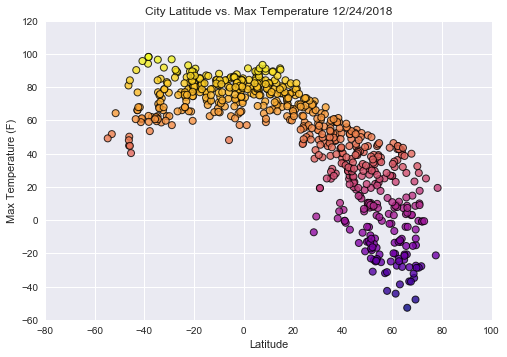

In [24]:
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

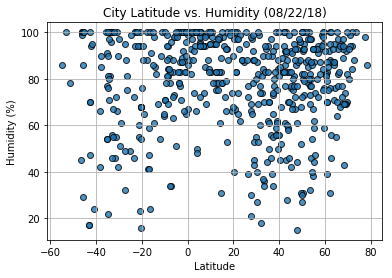

In [7]:
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

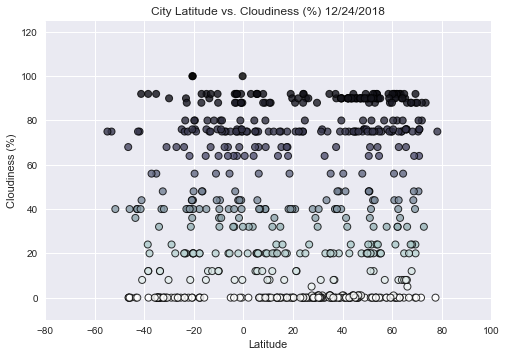

In [26]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

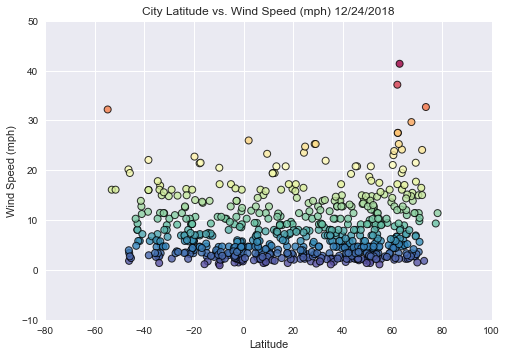

In [28]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()
